In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 76619
df = MongoBlotter(collection='live_blotter').read()
df.tail(20)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
95,5f47b4c236cdac3dfca7fff4,2020-08-27 15:27:30.777,2020-08-27 13:27:30.670,MNQU0,SELL,1.0,12007.500000,[00019125.5f46f6f4.01.01],174,1986475042,STOP-LOSS,0.47,-33.940000
96,5f47b4c236cdac3dfca7fff5,2020-08-27 15:27:30.777,2020-08-27 13:27:30.774,NQU0,SELL,2.0,12007.500000,[00019125.5f46f6f5.01.01],175,1986475043,STOP-LOSS,4.20,-618.400000
97,5f47b5d536cdac3dfca7fffe,2020-08-27 15:32:05.824,2020-08-27 13:32:05.820,YM SEP 20,BUY,1.0,28420.000000,[0001911f.5f46dff2.01.01],176,1986475046,ENTRY,2.10,0.000000
98,5f47b5de36cdac3dfca7ffff,2020-08-27 15:32:14.171,2020-08-27 13:32:14.076,MYM SEP 20,BUY,8.0,28419.500000,"[0001911f.5f46dff3.01.01, 0001911f.5f46dff5.01...",177,1986475050,ENTRY,3.76,0.000000
99,5f47bf5c36cdac3dfca80020,2020-08-27 16:12:44.848,2020-08-27 14:12:44.847,MYM SEP 20,SELL,8.0,28412.000000,"[0001911f.5f46e51d.01.01, 0001911f.5f46e51e.01...",179,1986475052,STOP-LOSS,3.76,-37.520000
100,5f47bf6b36cdac3dfca80021,2020-08-27 16:12:59.458,2020-08-27 14:12:59.457,YM SEP 20,SELL,1.0,28411.000000,[0001911f.5f46e523.01.01],178,1986475051,STOP-LOSS,2.10,-49.200000
101,5f47bf6b36cdac3dfca80022,2020-08-27 16:12:59.827,2020-08-27 14:12:59.824,MESU0,SELL,6.0,3474.500000,[00019123.5f470ca4.01.01],149,1040873947,STOP-LOSS,2.82,856.860000
102,5f47c38736cdac3dfca80033,2020-08-27 16:30:31.543,2020-08-27 14:30:31.541,YM SEP 20,BUY,1.0,28528.000000,[0001911f.5f46e6d2.01.01],180,1986475055,ENTRY,2.10,0.000000
103,5f47c39336cdac3dfca80034,2020-08-27 16:30:43.706,2020-08-27 14:30:43.569,MYM SEP 20,BUY,8.0,28532.500000,"[0001911f.5f46e6d3.01.01, 0001911f.5f46e6d5.01...",181,1986475058,ENTRY,3.76,0.000000
104,5f47c47b36cdac3dfca80035,2020-08-27 16:34:35.587,2020-08-27 14:34:35.585,MESU0,BUY,6.0,3495.000000,[00019123.5f471494.01.01],184,1986475063,ENTRY,2.82,0.000000


In [3]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [4]:
df.tail()

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2020-08-27 15:52:52.120,2020-08-27 17:52:52.258,NQ,BUY,0.9,12031.583333,191,ENTRY,4.23,0.000000,74248.110000
2020-08-27 16:00:49.319,2020-08-27 18:00:49.320,NQ,SELL,1.0,12007.750000,192,STOP-LOSS,2.10,-489.200000,73758.910000
2020-08-27 16:00:55.581,2020-08-27 18:00:55.582,NQ,SELL,0.9,12006.416667,193,STOP-LOSS,4.23,-461.460001,73297.449999
2020-08-27 16:22:14.923,2020-08-27 18:22:14.924,YM,SELL,1.0,28440.000000,182,STOP-LOSS,2.10,-444.200000,72853.249999
2020-08-27 16:22:22.260,2020-08-27 18:22:22.261,YM,SELL,0.8,28439.000000,183,STOP-LOSS,3.76,-381.520000,72471.729999


In [5]:
c = set(df['contract'])
#allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ', 'ES', 'GC', 'YM', 'total'])

In [6]:
allocs

NQ       0.400
ES       0.125
GC       0.225
YM       0.250
total    1.000
dtype: float64

In [7]:
df.groupby('contract').realizedPNL.sum()

contract
ES   -2731.210000
GC   -2747.540000
NQ    1672.479999
YM    -341.000000
Name: realizedPNL, dtype: float64

In [8]:
df.realizedPNL.sum()

-4147.270000999999

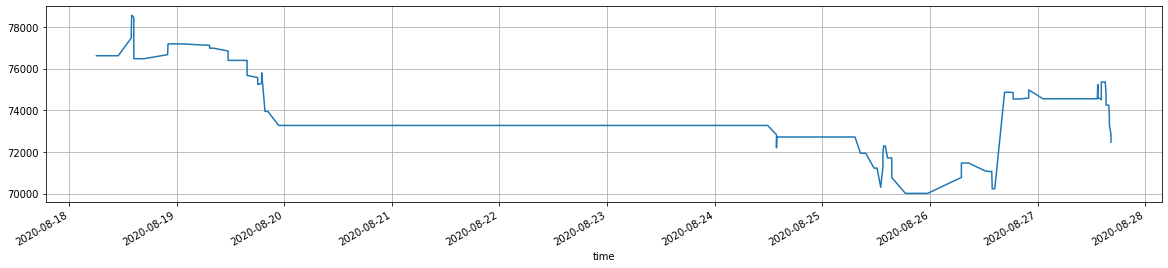

In [9]:
df.cash.plot(figsize=(20,4), grid=True);

In [10]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [11]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES    13
 GC    28
 NQ    58
 YM    16
 Name: action, dtype: int64,
 115)

In [12]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    1.625
 GC    3.500
 NQ    7.250
 YM    2.000
 Name: action, dtype: float64,
 14.375)

In [13]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     32.78
GC     70.54
NQ    159.52
YM     45.00
Name: commission, dtype: float64

In [14]:
df.commission.sum()

307.84000000000003

In [15]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
NQ,0.34,15.34,735.83,-363.86,2.02,10.03,30.8
GC,0.36,-174.50,652.65,-634.03,1.03,-170.83,10.9
ES,0.33,-288.92,996.85,-931.80,1.07,-295.35,5.4
YM,0.25,-43.94,962.49,-379.42,2.54,-43.94,7.0
total,0.33,-71.63,765.27,-490.09,1.56,-75.82,54.1


In [16]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [17]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,-0.226358,-0.219334,-0.066416,0.095708
GC,-0.226358,1.000000,0.385538,-0.788061,0.437277
NQ,-0.219334,0.385538,1.000000,-0.048709,0.927357
YM,-0.066416,-0.788061,-0.048709,1.000000,-0.104788
total,0.095708,0.437277,0.927357,-0.104788,1.000000


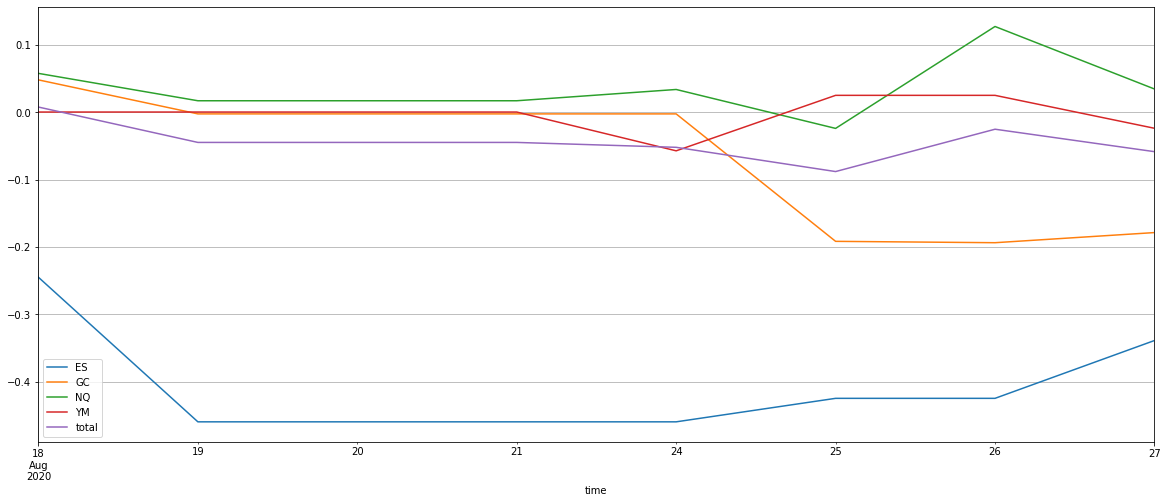

In [18]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

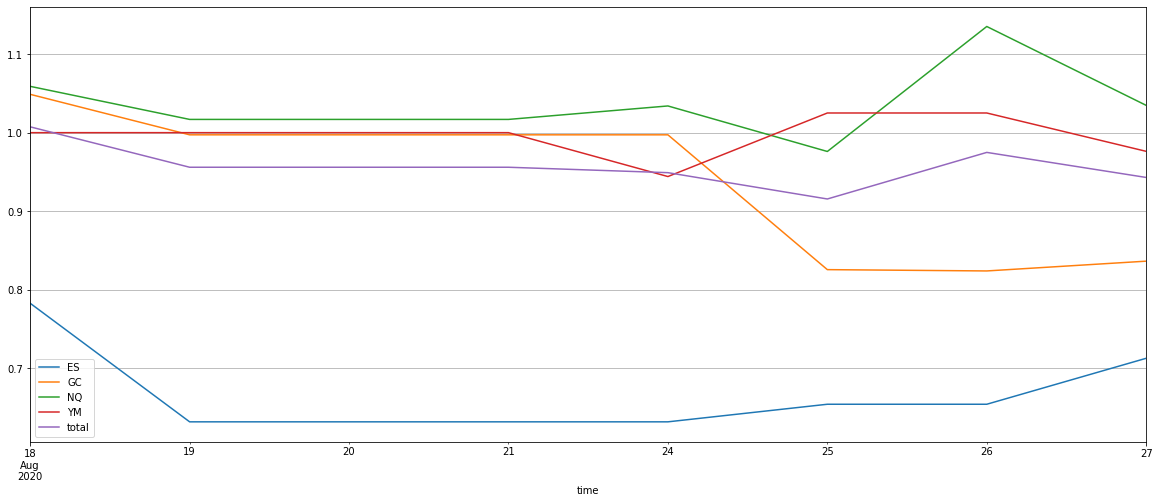

In [19]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [20]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,-0.999977,-0.996404,1.931933,-0.531519,-0.842752
Cumulative returns,-0.287265,-0.163611,0.034738,-0.023784,-0.057037
Annual volatility,1.733497,1.064560,1.237294,0.676098,0.564737
Sharpe ratio,-5.181985,-4.715909,1.389320,-0.829428,-3.019190
Calmar ratio,-2.715981,-4.647291,21.835006,-9.512570,-9.243354
Stability,0.020001,0.778922,0.035267,0.000945,0.286613
Max drawdown,-0.368183,-0.214405,-0.088479,-0.055875,-0.091174
Omega ratio,0.304581,0.286253,1.296111,0.828014,0.571435
Sortino ratio,-5.509968,-4.996853,2.733820,-1.360791,-4.306693
Skew,-0.864744,-1.596915,0.883756,0.853839,0.820333


In [21]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-08-31,-28.73,-16.36,3.47,-2.38,-5.7


In [22]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES      -29.0
GC      -16.0
NQ        3.0
YM       -2.0
total    -6.0
dtype: float64

In [23]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-08-26 16:38:55.001,NQ,SELL,11920.750000,4631.60
2020-08-25 13:31:03.690,YM,SELL,28328.000000,980.80
2020-08-27 14:12:59.824,ES,SELL,3474.500000,856.86
2020-08-18 13:54:15.983,NQ,SELL,11349.750000,850.80
2020-08-26 07:01:03.973,NQ,SELL,11727.500000,765.80
...,...,...,...,...
2020-08-25 08:30:42.939,NQ,SELL,11657.250000,-778.40
2020-08-26 13:53:43.617,NQ,SELL,11766.500000,-833.40
2020-08-25 13:01:46.413,GC,BUY,1936.966667,-918.46


In [24]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-08-26,0.000000,-0.002021,0.163050,0.000000,0.064765
2020-08-18,-0.217240,0.048797,0.058959,0.000000,0.007408
2020-08-20,0.000000,0.000000,0.000000,0.000000,0.000000
2020-08-21,0.000000,0.000000,0.000000,0.000000,0.000000
2020-08-24,0.000000,0.000000,0.016856,-0.055875,-0.007226
2020-08-27,0.089467,0.015122,-0.088479,-0.047635,-0.032714
2020-08-25,0.035434,-0.172120,-0.056059,0.085708,-0.035294
2020-08-19,-0.192834,-0.049155,-0.039756,0.000000,-0.051067
